# 2.2 Integration with pandas DataFrames

<div class="alert alert-info">

Please note: The following notebook requires you first run [signac_103_A_Basic_Workflow](signac_103_A_Basic_Workflow.ipynb).

</div>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import signac

%matplotlib inline
project = signac.get_project(root="projects/tutorial")

Let's first create a basic data frame from our project:

In [2]:
df = project.to_dataframe()
df = df.sort_values("sp.p")
df

,sp.p,sp.kT,sp.N,doc.V
5a6c687f7655319db24de59a2336eff8,0.100,1.0,1000,10000.000000
ee617ad585a90809947709a7a45dda9a,1.000,1.0,1000,1000.000000
22582e83c6b12336526ed304d4378ff8,1.200,1.0,1000,833.333333
c0ab2e09a6f878019a6057175bf718e6,2.300,1.0,1000,434.782609
d03270cdbbae73c8bb1d9fa0ab370264,2.575,1.0,1000,388.349515
9110d0837ad93ff6b4013bae30091edd,3.400,1.0,1000,294.117647
b45a2485a44a46364cc60134360ea5af,4.500,1.0,1000,222.222222
973e29d6a4ed6cf7329c03c77df7f645,5.050,1.0,1000,198.019802
05061d2acea19d2d9a25ac3360f70e04,5.600,1.0,1000,178.571429
665547b1344fe40de5b2c7ace4204783,6.700,1.0,1000,149.253731


Now we can select specific data subsets, for example simulations with pressure equal to 0.1 or volumes greater than 500:

In [3]:
df[(df["sp.p"] == 0.1) | (df["doc.V"] > 500)]

,sp.p,sp.kT,sp.N,doc.V
5a6c687f7655319db24de59a2336eff8,0.1,1.0,1000,10000.000000
ee617ad585a90809947709a7a45dda9a,1.0,1.0,1000,1000.000000
22582e83c6b12336526ed304d4378ff8,1.2,1.0,1000,833.333333


Or we can plot a pressure-volume (p-V) phase diagram for our pretend data using matplotlib:

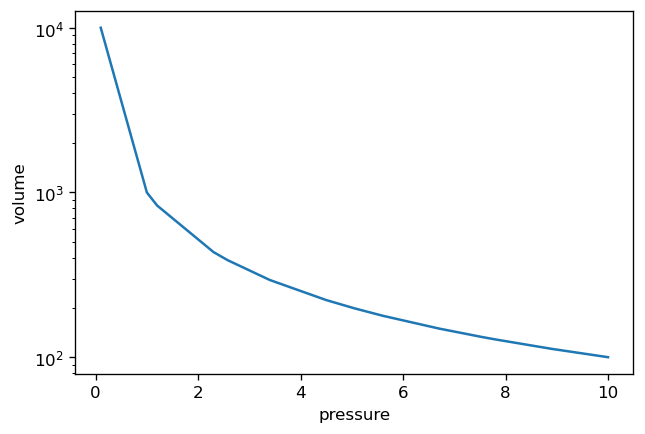

In [4]:
fig, ax = plt.subplots(dpi=120)
df.plot("sp.p", "doc.V", ax=ax)
ax.set_yscale("log")
ax.set_xlabel("pressure")
ax.set_ylabel("volume")
ax.get_legend().remove()
plt.show()